In [46]:
from tensorflow.keras.datasets.mnist import load_data

In [47]:
(trainX, trainy), (testX, testy) = load_data()

In [48]:
trainX = trainX[:1000]
trainy = trainy[:1000]
testX = testX[:100]
testy = testy[:100]

Resize dataset

In [49]:
import tensorflow as tf
trainX = tf.map_fn(lambda i: tf.stack([i]*3, axis=-1), trainX).numpy()
testX = tf.map_fn(lambda i: tf.stack([i]*3, axis=-1), testX).numpy()

trainX = tf.image.resize(trainX, [224,224]).numpy()
testX = tf.image.resize(testX, [224,224]).numpy()

Normalization

In [50]:
trainX = trainX/255.0
testX = testX/255.0

In [51]:
trainy = tf.keras.utils.to_categorical(trainy, num_classes=10)
testy = tf.keras.utils.to_categorical(testy, num_classes=10)

In [52]:
INDEX= int(0.8 * len(trainX))
trainX = trainX[:INDEX]
trainy = trainy[:INDEX]

val_x = trainX[INDEX:]
val_y = trainy[INDEX:]


Import Necessary Libraries

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Step 1: Define the model

In [54]:
ZFNet = Sequential()
ZFNet.add(Conv2D(96, (7,7), strides=(2,2), activation='relu', input_shape=(224,224,3)))
ZFNet.add(MaxPooling2D(3, strides=2))
ZFNet.add(Lambda(lambda x: tf.image.per_image_standardization(x)))

ZFNet.add(Conv2D(256, (5,5), strides=(2,2), activation='relu'))
ZFNet.add(MaxPooling2D(3, strides=2))
ZFNet.add(Lambda(lambda x: tf.image.per_image_standardization(x)))

ZFNet.add(Conv2D(384, (3,3), activation='relu'))
ZFNet.add(Conv2D(384, (3,3),  activation='relu'))
ZFNet.add(Conv2D(256, (3,3),  activation='relu'))

ZFNet.add(MaxPooling2D(3, strides=2))
ZFNet.add(Flatten())
ZFNet.add(Dense(4096))
ZFNet.add(Dense(4096))
ZFNet.add(Dense(10, activation='softmax'))

Step2: Compile the model

In [65]:
import tensorflow
ZFNet.compile(optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(5)])
reduce_lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=1, min_lr=0.00001)


Step 3: Fit the model

In [66]:
ZFNet.fit(trainX, trainy, batch_size=128, validation_data=(val_x, val_y), epochs=10, callbacks=[reduce_lr])

Epoch 1/10
7/7 [==============================] - 86s 12s/step - loss: 2.1428 - accuracy: 0.2237 - top_k_categorical_accuracy: 0.6538
Epoch 2/10
7/7 [==============================] - 85s 12s/step - loss: 1.7345 - accuracy: 0.4212 - top_k_categorical_accuracy: 0.8650
Epoch 3/10
7/7 [==============================] - 85s 12s/step - loss: 1.2931 - accuracy: 0.5700 - top_k_categorical_accuracy: 0.9375
Epoch 4/10
7/7 [==============================] - 85s 12s/step - loss: 1.0588 - accuracy: 0.6413 - top_k_categorical_accuracy: 0.9588
Epoch 5/10
7/7 [==============================] - 85s 12s/step - loss: 0.8585 - accuracy: 0.7387 - top_k_categorical_accuracy: 0.9837
Epoch 6/10
7/7 [==============================] - 84s 12s/step - loss: 0.6556 - accuracy: 0.7987 - top_k_categorical_accuracy: 0.9837
Epoch 7/10
7/7 [==============================] - 85s 12s/step - loss: 0.5586 - accuracy: 0.8150 - top_k_categorical_accuracy: 0.9850
Epoch 8/10
7/7 [==============================] - 84s 12s/step

Step4: Evaluate the model

In [70]:
acc = ZFNet.evaluate(testX, testy)


4/4 [==============================] - 3s 656ms/step - loss: 0.5086 - accuracy: 0.8400 - top_k_categorical_accuracy: 0.9900


Model Summary

In [71]:
ZFNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 109, 109, 96)      14208     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 96)        0         
_________________________________________________________________
lambda_6 (Lambda)            (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
lambda_7 (Lambda)            (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 384)      

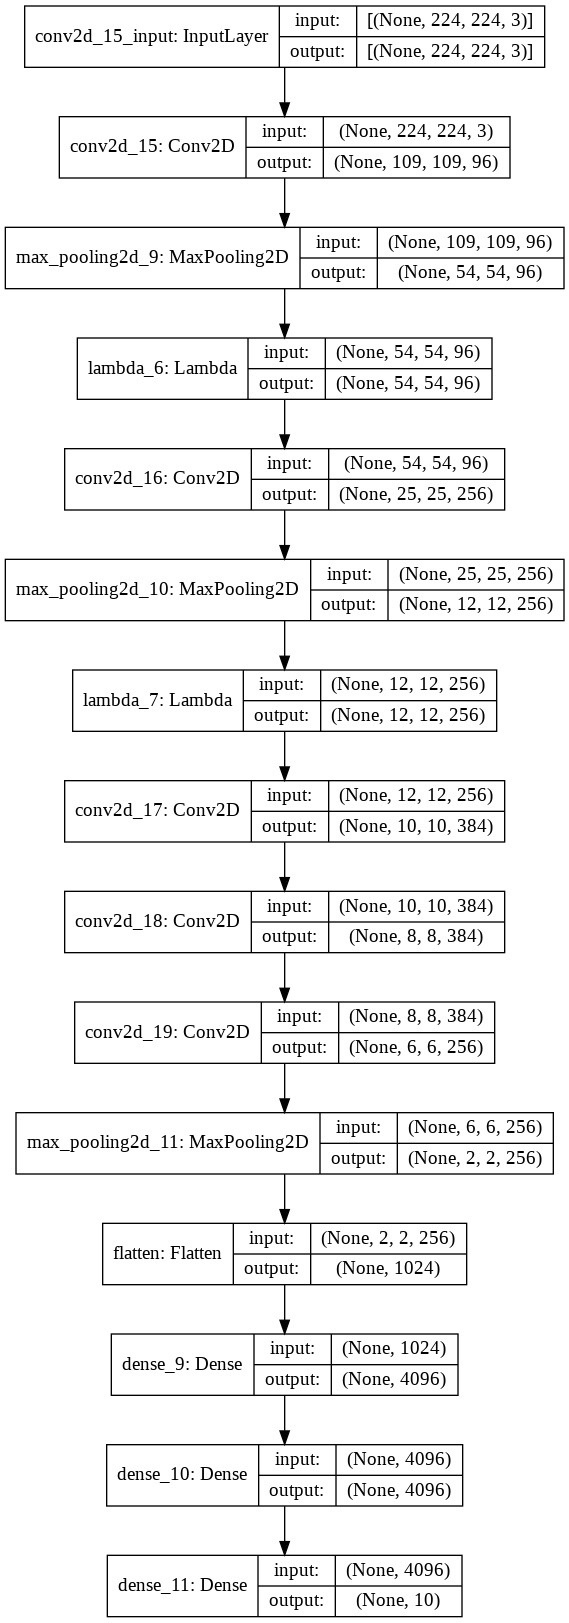

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(ZFNet, 'model.png', show_shapes=True)